<a href="https://colab.research.google.com/github/assamidanov/Important-Featues-of-IDPs-/blob/master/Data_Cleaning_%26_FE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Displacement Data: Afghanistan (Herat, Jalalabad)

Afghanistan faces one of the world’s most acute internal displacement crises; the result of several factors, including protracted conflict, ongoing insecurity and natural hazards. Displacement has become a familiar survival strategy for many Afghans and, in some cases, an inevitable part of life for two generations.

As of 31 December 2018, Afghanistan has 2,598,000 total number of internally displaced people(IDP)(http://www.internal-displacement.org/). 

Displacement affects all individuals differently with needs, vulnerabilities and protection risks evolving over time due to exhaustion of coping mechanisms and only basic emergency assistance provided following initial displacement. Inadequate shelter, food insecurity, insufficient access to sanitation and health facilities, as well as a lack of protection, often result in precarious living conditions that jeopardises the well-being and dignity of affected families.

The survey was taken in by Arqaam to quantitatively monitor and evaluate the huminatatian assitantance projects by NGOs. It is also directed towards to understand the status-quo before the begining of the project, and the impact the project had over time. 

The survey has ### comprehensive questions and 11260 respndents. The survey were taken in randomly stratified approach. Jalalabadd and Herat is chosen as a target region. it can be claimed with its variety of ethnic groups and displacement specifications both cities can be representative of Afghanistan.


This study will analyze the data. I will try to implement machine learning algorithm to identify the displacement status of the respondent based on the given information. Then, I will identify importance features which defines this diplacement status. 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import descartes
%matplotlib inline
import seaborn as sns

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':'1EjvccnOqYOHe9zR5B1rIy2UVjfDnQpbI'}) # replace the id with id of file you want to access
downloaded.GetContentFile('baseline.csv')

In [0]:
baseline = pd.read_csv('baseline.csv')
baseline.replace('no_inf', np.nan, inplace = True)
baseline.shape # with print and format

(11260, 154)

# Data Cleaning

In this part, I divided the survey is divided into 10 parts, as it was originally did in the survey. I firstly, converted column names into more readable manner. Secondly, I deleted some minor variable which are unrelated to the final outcome or these variables are already explained by the other variables. 

### Basics
df_basics contains generel household information like name, gender, marital status and household composition.

In [0]:
df_basics = baseline.loc[:, 'City':'hh_lit_male']
df_basics.rename(columns = {'a_basics/a01' : 'sex',
                            'a_basics/a02' : 'marital_st',
                            'a_basics/a03': "ethnic",
                            'b_hh/b01a': 'fem_0_4years',
                            'b_hh/b01b': 'male_0_4years',
                            'b02a': 'fem_5_11years',
                            'b02b': 'male_5_11years',
                            'b03a': 'fem_12_17years',
                            '/b03b': 'male_12_17years',
                            'b04a': 'fem_18_59years',
                            'b04b': 'male_18_59years',
                            'b06a': 'fem_15_24years',
                            'b06b': 'male_15_24years',
                            'b05a': 'fem_60years',
                            'b05b': 'male_60years'
                           }, inplace = True)

df_basics = df_basics[['City', 'loc_herat','sex', 'marital_st', 'ethnic', 'hh_total', 'male_0_4years',
          'fem_5_11years', 'male_5_11years', 'fem_12_17years', 'male_12_17years',
          'fem_18_59years','male_18_59years', 'fem_60years', 'male_60years', 'fem_15_24years',
          'male_15_24years', 'hh_lit_female', 'hh_lit_male']]
df_basics.head()

,City,loc_herat,sex,marital_st,ethnic,hh_total,male_0_4years,fem_5_11years,male_5_11years,fem_12_17years,male_12_17years,fem_18_59years,male_18_59years,fem_60years,male_60years,fem_15_24years,male_15_24years,hh_lit_female,hh_lit_male
0,herat,herat_01,male,married living with spouse,tajik,7,0,0,0,1,2,2,2,0,0,2,3,3,4
1,herat,herat_01,female,married living with spouse,hazara,5,0,0,0,0,0,3,1,0,1,2,0,3,2
2,herat,herat_01,female,married living with spouse,pashtun,17,0,0,0,0,4,7,5,0,1,3,5,7,10
3,herat,herat_01,female,widow,tajik,9,0,0,0,0,0,4,4,1,0,2,1,5,4
4,herat,herat_01,female,married living with spouse,tajik,8,0,0,1,2,0,2,2,0,1,4,2,4,3


### Origin

df_origin contains information about family origin and reasons for settlement

In [0]:
df_origin = baseline.loc[:, 'c_origin/c01':'c_origin/c04']
df_origin.rename(columns = {'c_origin/c01c': 'reason_settle',
                 'c_origin/c02a': 'other_place',
                 'c_origin/c02': 'province',
                 'c_origin/c03': 'district',
                 'c_origin/c01': 'fam_origin'
                 }, inplace = True)

In [0]:
df_origin = df_origin[['fam_origin', 'province', 'district', 'other_place']]
df_origin.head()

,fam_origin,province,district,other_place
0,yes,herat,enjil,no
1,yes,herat,enjil,no
2,yes,herat,enjil,no
3,yes,herat,zendahjan,no
4,yes,herat,enjil,no


### Access to Basic Services

df_service contains information about education of household members,health, electricity, water, water source and identity card

In [0]:
df_service = baseline.loc[:, 'f_access/f_lit/f01a':'f_access/f11']
df_service.rename(columns = {'f_access/f_lit/f01a': 'lit_female',
                             'f_access/f_lit/f01b': 'lit_male',
                             'f_access/f02a': 'educ_family',
                             'f_access/f02b': 'educ_level',
                             'f_access/f03': 'electric',
                             'f_access/f04': 'source_water',
                             'f_access/f04a': 'compound_water',
                             'f_access/f05': 'clean',
                             'f_access/f06': 'latrine_kind',
                             'f_access/f06b': 'latrine_share',
                             'f_access/f06c': 'sep_latrine',
                             'f_access/f07': 'have_tazkera',
                             'f_access/f09': 'health_prox',
                             'f_access/f10': 'hlth_facility',
                             'f_access/f11': 'h_fac_issue'
                            }, inplace = True)
df_service = df_service[['educ_family', 'educ_level', 'electric', 'clean', 'latrine_share', 'sep_latrine', 'have_tazkera', 'health_prox']]
df_service.head()

,educ_family,educ_level,electric,clean,latrine_share,sep_latrine,have_tazkera,health_prox
0,edu_girl,sch_high,yes,w_good,no,no,yes,minh_mid
1,edu_boy,sch_post,yes,w_good,no,no,yes,minh_mid
2,edu_girl,sch_uni,yes,w_good,no,no,yes,minh_mid
3,edu_boy,sch_prim,yes,w_good,no,no,yes,minh_mid
4,edu_girl,sch_dipl,yes,w_good,no,no,yes,minh_mid


### Assets 

df_asset contains information about assets of the respondent starting from land to the house items.

In [0]:
df_assets = baseline.loc[:, 'g_social/g01':'h_assets/h23']
df_assets.rename(columns = {'g_social/g01': 'soc_assist',
                            'h_assets/h01': 'shelter_type',
                            'h_assets/h01a': 'hhsld_number', 
                            'h_assets/h02': 'own_land',
                            'h_assets/h03': 'land_deed',
                            'h_assets/h04': 'livestock_type',
                            'h_assets/h18': 'kitchen_items',
                            'h_assets/h19': 'school_items',
                            'h_assets/h20': 'own_matress',
                            'h_assets/h21': 'own_blanket',
                            'h_assets/h22': 'water_containers',
                            'h_assets/h23': 'hygiene_items'
                           }, inplace = True)
df_assets = df_assets[['soc_assist', 'shelter_type', 'own_land', 'land_deed', 'livestock_type', 'kitchen_items', 'school_items', 'own_matress', 'own_blanket', 'water_containers', 'hygiene_items']]
df_assets.head()

,soc_assist,shelter_type,own_land,land_deed,livestock_type,kitchen_items,school_items,own_matress,own_blanket,water_containers,hygiene_items
0,no,shelter_own,yes,deed_formal,livestock_none,yes,yes,no,no,yes,yes
1,no,shelter_own,no,na_no_land,livestock_none,yes,yes,no,no,no,yes
2,no,shelter_own,no,na_no_land,livestock_none,yes,yes,no,no,no,yes
3,no,shelter_house,no,na_no_land,livestock_none,yes,no,no,no,no,yes
4,no,shelter_own,no,na_no_land,livestock_none,yes,yes,no,no,yes,yes


### Adaptive Capacity & Stereotypes  & Programme

df_other contains information about education, income, overall consumption, debts and savings. it also includes opinions about idps and activities towards idps

In [0]:
df_other= baseline.loc[:, 'i_adaptive/i01':'k_interest/k_participate/k05']
df_other.rename(columns = {'i_adaptive/i01': 'people_working',
                           'i_adaptive/i04': 'income_monthly',
                           'i_adaptive/i05': 'school_attending',
                           'i_adaptive/i06': 'food_exp',
                           'i_adaptive/i07': 'heating_exp',
                           'i_adaptive/i08': 'trans_exp',
                           'i_adaptive/i09': 'saving',
                           'i_adaptive/i10': 'debt',
                           'i_adaptive/i11': 'vulnerability',
                           'j_stereotypes/j01': 'fam_cat',
                           'j_stereotypes/j02': 'idp_source',
                           'j_stereotypes/j03': 'idp_source_inf',
                           'j_stereotypes/j0': 'think_displace',
                           'k_interest/k01': 'interest_participate',
                           'k_interest/k_participate/k02': 'self_help',
                           'k_interest/k_participate/k03':'lit_train',
                           'k_interest/k_participate/k04': 'vocat_train',
                           'k_interest/k_participate/k05': 'micro_finance_train'
                          }, inplace = True)
df_other = df_other[['people_working', 'income_monthly', 'school_attending', 'food_exp', 'heating_exp', 'trans_exp', 'saving', 'debt', 'vulnerability']]

In [0]:
columns = ['vul_minor', 'vul_woman', 'vul_sing_male', 'vul_sing_female', 'vul_ill' 'vul_poor', 
           'vul_plw', 'vul_drugs', 'vul_old', 'vul_pdisabled', 'vul_mdisabled', 'vul_medcial', 
           'vul_special', 'vul_ochildren']
for i in columns:
    df_other[i] = df_other['vulnerability'].str.contains(i)
    index_1 = df_other[df_other[i].notnull()][i].index
    df_other.loc[index_1,i] = df_other[df_other[i].notnull()][i].astype(int)
df_other = df_other.drop('vulnerability', axis=1)

In [0]:
df_other.head()

,people_working,income_monthly,school_attending,food_exp,heating_exp,trans_exp,saving,debt,vul_minor,vul_woman,vul_sing_male,vul_sing_female,vul_illvul_poor,vul_plw,vul_drugs,vul_old,vul_pdisabled,vul_mdisabled,vul_medcial,vul_special,vul_ochildren
0,2,8000,yes,expenses_half,expenses_lessh,transport_more,saving_none,debt_less,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,3000,yes,expenses_mhalf,expenses_lessh,transport_nothing,saving_none,debt_less,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,7000,yes,expenses_mhalf,expenses_lessh,transport_more,saving_none,debt_more,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,4000,yes,expenses_mhalf,expenses_lessh,transport_nothing,saving_none,debt_less,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,3000,no,expenses_mhalf,expenses_lessh,transport_less,saving_none,debt_less,0,0,0,0,0,0,0,0,0,0,0,0,0


# Explonatory Data Analysis

In this part, I decided to to analyze displacement status of the respondents. The 90% percent of the respondents are Host of that region.

In [0]:
downloaded = drive.CreateFile({'id':'1_38PIwQfzwYeGT8suf26JhVQU5-TOmA4'})
downloaded.GetContentFile('geo_info.xlsx') 
geo = pd.read_excel(io='geo_info.xlsx', sheet_name='Sheet1', encoding='utf-8')
df_loc = df_basics[['City', 'loc_herat']]
geo = pd.concat([df_loc, geo.reindex(df_loc.index)], axis=1)
geo_herat = geo[geo['City']=='herat']
geo_jilal = geo[geo['City']=='jalalabad']
geo.head()

,City,loc_herat,_geo_latitude,_geo_longitude,Status
0,herat,herat_01,34.355355,62.206247,Host
1,herat,herat_01,34.355356,62.206249,Host
2,herat,herat_01,34.355354,62.206247,Host
3,herat,herat_01,34.355354,62.206247,Host
4,herat,herat_01,34.355354,62.206247,Host


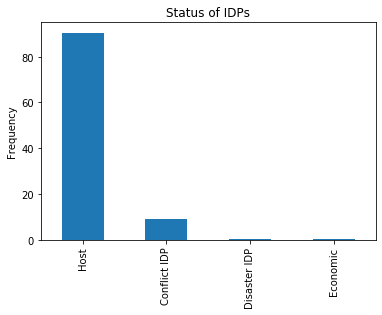

Host            90.568384
Conflict IDP     9.014210
Disaster IDP     0.275311
Economic         0.142096
Name: Status, dtype: float64


In [0]:
bar_df = geo['Status'].value_counts(normalize = True)*100
bar_df.plot.bar()
plt.ylabel('Frequency')
plt.title('Status of IDPs')

plt.show()
print(bar_df)

# Correlation Coefficients

In [0]:
del df_basics['City'], df_basics['loc_herat']
del geo['City']
del geo['_geo_latitude'], geo['_geo_longitude']
df_cat = [geo, df_basics, df_other, df_service, df_origin, df_assets]
df_cat = pd.concat(df_cat, join='outer', axis=1)

In [0]:
df_cat.isnull().sum()

loc_herat           0
Status              0
sex                 0
marital_st          0
ethnic              0
                   ..
school_items        0
own_matress         0
own_blanket         0
water_containers    0
hygiene_items       0
Length: 63, dtype: int64

In [0]:
from sklearn import preprocessing
def label_encoder(df):
    label_encoder = preprocessing.LabelEncoder()
    df_1 = df.copy()
    for i in df_1.select_dtypes('object').columns:
        df_1[i]=label_encoder.fit_transform(df[i].astype(str))
        original = df.copy()
        mask = df.isnull()
        df_1 = df_1.where(~mask, original)
    for i in df_1.select_dtypes('object').columns:
        df_1[i] = df_1[i].astype('float')
    return df_1

In [0]:
basics = label_encoder(df_basics)
other = label_encoder(df_other)
service = label_encoder(df_service)
origin = label_encoder(df_origin)
assets = label_encoder(df_assets)
df_geo = label_encoder(geo)


In [0]:
def corr_map(df):
    f = plt.figure(figsize=(10, 10))
    plt.matshow(df.corr(), fignum=f.number)
    plt.xticks(range(df.shape[1]), df.columns, fontsize=10,rotation=90)
    plt.yticks(range(df.shape[1]), df.columns, fontsize=10)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    return plt.show()

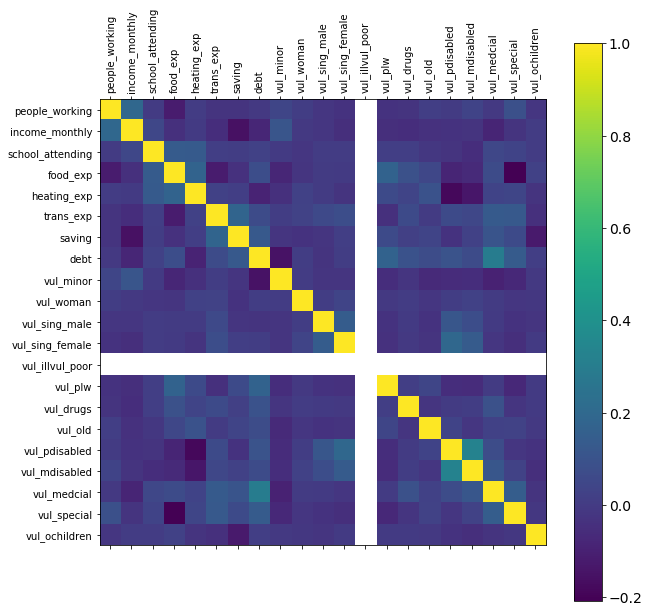

In [0]:
corr_map(other)

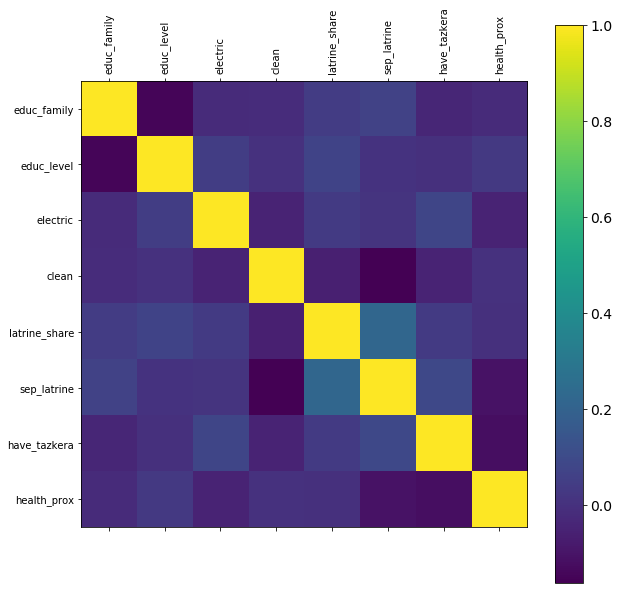

In [0]:
corr_map(service)

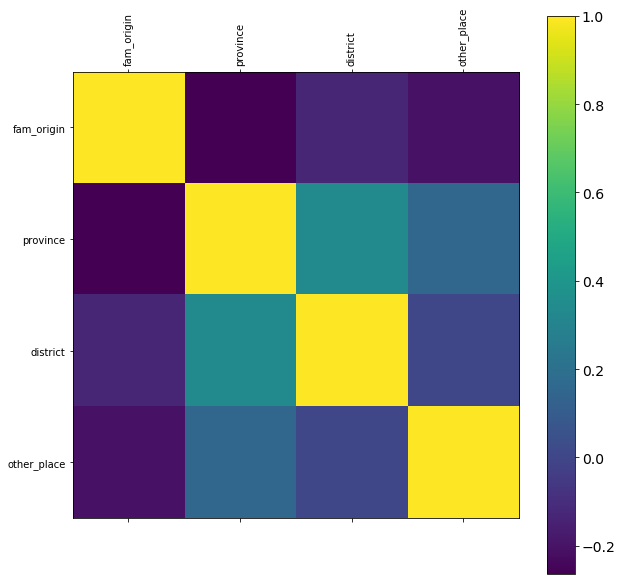

In [0]:
corr_map(origin)

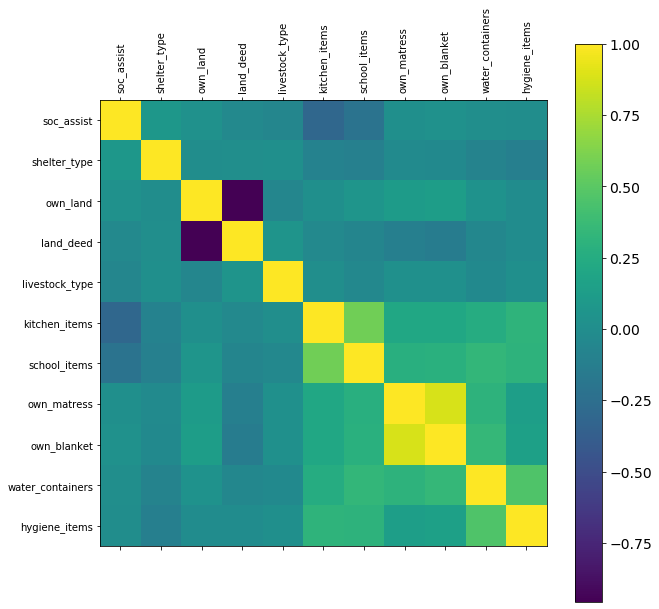

In [0]:
corr_map(assets)

 # Feature Engineering
 
 Since the dataset has a lot features, it requires to select the most important features. Firstly, I checked the correlation betwwen the variables. if the the variables are highly correlated I removed one of the variable. Secondly, I implemented Random Forest algorithms with optimal hyperparametes, and identify importances

In [0]:
assets=assets.drop(['land_deed','own_blanket'], axis=1)
other=other.drop('vul_illvul_poor', axis=1)

In [0]:
dfs = [df_geo, basics, other, service, origin, assets]
df = pd.concat(dfs, join='outer', axis=1)

In [0]:
df.head()

,loc_herat,Status,sex,marital_st,ethnic,hh_total,male_0_4years,fem_5_11years,male_5_11years,fem_12_17years,male_12_17years,fem_18_59years,male_18_59years,fem_60years,male_60years,fem_15_24years,male_15_24years,hh_lit_female,hh_lit_male,people_working,income_monthly,school_attending,food_exp,heating_exp,trans_exp,saving,debt,vul_minor,vul_woman,vul_sing_male,vul_sing_female,vul_plw,vul_drugs,vul_old,vul_pdisabled,vul_mdisabled,vul_medcial,vul_special,vul_ochildren,educ_family,educ_level,electric,clean,latrine_share,sep_latrine,have_tazkera,health_prox,fam_origin,province,district,other_place,soc_assist,shelter_type,own_land,livestock_type,kitchen_items,school_items,own_matress,water_containers,hygiene_items
0,0,3,1,2,5,7,0,0,0,1,2,2,2,0,0,2,3,3,4,2,8000,1,1,2,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,1,2,0,0,1,1,1,11.0,61.0,1.0,0,4,1,26,1,1,0,1,1
1,0,3,0,2,2,5,0,0,0,0,0,3,1,0,1,2,0,3,2,1,3000,1,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,5,1,2,0,0,1,1,1,11.0,61.0,1.0,0,4,0,26,1,1,0,0,1
2,0,3,0,2,4,17,0,0,0,0,4,7,5,0,1,3,5,7,10,3,7000,1,3,2,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,3,8,1,2,0,0,1,1,1,11.0,61.0,1.0,0,4,0,26,1,1,0,0,1
3,0,3,0,5,5,9,0,0,0,0,0,4,4,1,0,2,1,5,4,1,4000,1,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,1,2,0,0,1,1,1,11.0,218.0,1.0,0,1,0,26,1,0,0,0,1
4,0,3,0,2,5,8,0,0,1,2,0,2,2,0,1,4,2,4,3,1,3000,0,3,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,1,2,0,0,1,1,1,11.0,61.0,1.0,0,4,0,26,1,1,0,1,1


In [0]:
data = pd.DataFrame(df.isnull().sum().reset_index().values, columns=["col_name", "number"])
data[data['number']!=0]

,col_name,number
48,province,1118
49,district,1175
50,other_place,521


In [0]:
df = df[[i for i in data[data['number']==0]['col_name'].unique()]]

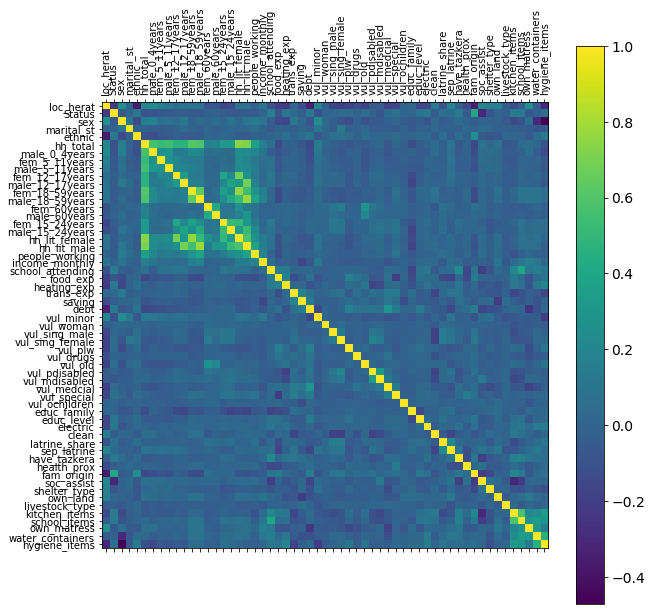

In [0]:
corr_map(df)

In [0]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [0]:
df.to_csv('df_arqaam.csv', index = False)
!cp df_arqaam.csv "drive/My Drive/ML Projects/Arqaam"